##### Submitted By:
> Richard Honey

# FIFA 19 Analysis

In [49]:
import pandas as pd
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df =  pd.read_csv('data.csv',delimiter = ',')

## Data Structure

In [51]:
df.head()

Unnamed: 0      ID               Name  Age  \
0           0  158023           L. Messi   31   
1           1   20801  Cristiano Ronaldo   33   
2           2  190871          Neymar Jr   26   
3           3  193080             De Gea   27   
4           4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

                  Club  ... Composure Marking StandingTackle  SlidingTackle  \
0         FC Barcelona  ...      96.0    33.0           28.0           26.0   
1             Juventus  ...      95.0    28.0           31.0           23.0   
2  Paris Saint-Germain  ...      94.0    27.0           24.0           33.0   
3    Manchester United  ...      68.0    15.0           21.0           13.0   
4      Manchester City  ...      88.0    68.0           58.0           51.0   

  GKDiving  GKHandling  GKKicking  GKPositioning GKReflexes Release Clause  
0      6.0        11.0       15.0           14.0        8.0        €226.5M  
1      7.0        11.0       15.0           14.0       11.0        €127.1M  
2      9.0         9.0       15.0           15.0       11.0        €228.1M  
3     90.0        85.0       87.0           88.0       94.0        €138.6M  
4     15.0        13.0        5.0           10.0       13.0        €196.4M  

[5 rows x 89 columns]

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [53]:
df.shape

(18207, 89)

## Data Pre-processing

### Deleting Columns

In [54]:
df = df.drop(columns="Unnamed: 0")

In [55]:
columns = ['Photo', 'Flag', 'Club Logo', 'Release Clause', 'Jersey Number', 'Loaned From', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM',
       'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB', 'LS', 'ST']
df = df.drop(columns, axis=1, inplace=False )

In [56]:
column = ['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']

df = df.drop(column, axis=1, inplace=False )

#### Checking the columns

In [57]:
df.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Real Face', 'Position', 'Joined', 'Contract Valid Until',
       'Height', 'Weight'],
      dtype='object')

### Data Conversion

#### Height Conversion from inch to centimeter

In [58]:
#in centimeter
def height_conversion(height):
    if(pd.isna(height))!= True:
        chk = str(height)
        h = []
        h = chk.split("'")  
        ft = float(h[0])
        if( h[1] != ''):
            inch = float(h[1])
        else:
            inch = 0
        tot_inc = inch + ft*12
        h = tot_inc * 2.54
        return h
    else:
        return height
    
df['Height'] = df['Height'].apply(height_conversion)

#### Weight conversion: lbs to kg

In [59]:
#in kg
def weight_conversion(weight):
    if(pd.isna(weight))!= True:
        w = int(weight[0:-3])*0.453592
        return w
    else:
        return weight
    
df['Weight'] = df['Weight'].apply(weight_conversion)

#### Getting rid of all the elements that makes difficult to convert the different columns datatypes

In [60]:

df['Value'] = df['Value'].str.replace('€', '')
df['Value'] = df['Value'].str.replace('M', '')
df['Value'] = df['Value'].str.replace('K', '000')
df['Wage'] = df['Wage'].str.replace('€', '')
df['Wage'] = df['Wage'].str.replace('K', '000')

#### Renaming Columns

In [61]:
df.rename(columns = {'Value':"Value(millions)"}, inplace = True)

#### Changing the datatypes of the selected columns

In [62]:

df = df.astype({"Name":'category', "Value(millions)":'float', "Wage":'int64'})


#### Changing the datatype of date

In [63]:
df['Joined'] = pd.to_datetime(df['Joined'])

### Treating Null Values

#### Checking for Null values

In [64]:
df.columns[df.isnull().any()]

Index(['Club', 'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Joined', 'Contract Valid Until', 'Height', 'Weight'],
      dtype='object')

In [65]:
df.isnull().sum()

ID                             0
Name                           0
Age                            0
Nationality                    0
Overall                        0
Potential                      0
Club                         241
Value(millions)                0
Wage                           0
Special                        0
Preferred Foot                48
International Reputation      48
Weak Foot                     48
Skill Moves                   48
Work Rate                     48
Body Type                     48
Real Face                     48
Position                      60
Joined                      1553
Contract Valid Until         289
Height                        48
Weight                        48
dtype: int64

#### Replacing Null values with most frequent values

In [66]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
imputer = imputer.fit(df[['Club']])
df['Club'] = imputer.transform(df[['Club']])

imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
imputer = imputer.fit(df[['Preferred Foot']])
df['Preferred Foot'] = imputer.transform(df[['Preferred Foot']])

imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
imputer = imputer.fit(df[['International Reputation']])
df['International Reputation'] = imputer.transform(df[['International Reputation']])

imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
imputer = imputer.fit(df[['Weak Foot']])
df['Weak Foot'] = imputer.transform(df[['Weak Foot']])

imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
imputer = imputer.fit(df[['Skill Moves']])
df['Skill Moves'] = imputer.transform(df[['Skill Moves']])

imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
imputer = imputer.fit(df[['Work Rate']])
df['Work Rate'] = imputer.transform(df[['Work Rate']])

imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
imputer = imputer.fit(df[['Body Type']])
df['Body Type'] = imputer.transform(df[['Body Type']])

imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
imputer = imputer.fit(df[['Real Face']])
df['Real Face'] = imputer.transform(df[['Real Face']])

imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
imputer = imputer.fit(df[['Position']])
df['Position'] = imputer.transform(df[['Position']])

imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
imputer = imputer.fit(df[['Contract Valid Until']])
df['Contract Valid Until'] = imputer.transform(df[['Contract Valid Until']])

#### Replacing null values by forward filling

In [67]:
df['Joined'] = df['Joined'].fillna(value = df['Joined'].ffill())

#### Replacing Null values with mean

In [68]:
df['Height'] = df['Height'].fillna(value = df['Height'].mean())
df['Weight'] = df['Weight'].fillna(value = df['Weight'].mean())

#### Checking for any Null values

In [69]:
df.columns[df.isnull().any()]

Index([], dtype='object')

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        18207 non-null  int64         
 1   Name                      18207 non-null  category      
 2   Age                       18207 non-null  int64         
 3   Nationality               18207 non-null  object        
 4   Overall                   18207 non-null  int64         
 5   Potential                 18207 non-null  int64         
 6   Club                      18207 non-null  object        
 7   Value(millions)           18207 non-null  float64       
 8   Wage                      18207 non-null  int64         
 9   Special                   18207 non-null  int64         
 10  Preferred Foot            18207 non-null  object        
 11  International Reputation  18207 non-null  float64       
 12  Weak Foot         

#### Saving the pre-processed data into an Excel sheet

In [71]:
df.to_csv('Pre-processed.csv')

## EDA

## Univariate Analysis

In [72]:
df.describe()

ID           Age       Overall     Potential  \
count   18207.000000  18207.000000  18207.000000  18207.000000   
mean   214298.338606     25.122206     66.238699     71.307299   
std     29965.244204      4.669943      6.908930      6.136496   
min        16.000000     16.000000     46.000000     48.000000   
25%    200315.500000     21.000000     62.000000     67.000000   
50%    221759.000000     25.000000     66.000000     71.000000   
75%    236529.500000     28.000000     71.000000     75.000000   
max    246620.000000     45.000000     94.000000     95.000000   

       Value(millions)           Wage       Special  International Reputation  \
count     18207.000000   18207.000000  18207.000000              18207.000000   
mean     262881.260246    9731.312133   1597.809908                  1.112924   
std      291450.965245   21999.290406    272.586016                  0.393554   
min           0.000000       0.000000    731.000000                  1.000000   
25%           4.400000    1000.000000   1457.000000                  1.000000   
50%      160000.000000    3000.000000   1635.000000                  1.000000   
75%      475000.000000    9000.000000   1787.000000                  1.000000   
max      975000.000000  565000.000000   2346.000000                  5.000000   

          Weak Foot   Skill Moves        Height        Weight  
count  18207.000000  18207.000000  18207.000000  18207.000000  
mean       2.947438      2.360356    181.257584     75.286805  
std        0.659591      0.755394      6.721268      7.063686  
min        1.000000      1.000000    154.940000     49.895120  
25%        3.000000      2.000000    175.260000     69.853168  
50%        3.000000      2.000000    180.340000     74.842680  
75%        3.000000      3.000000    185.420000     79.832192  
max        5.000000      5.000000    205.740000    110.222856

#### Table of Indian footballers

In [73]:
def country(x):
    return df[df['Nationality'] == x][['Name','Overall','Potential','Position', 'Value(millions)', 'Height', 'Weight']]

country('India')

Name  Overall  Potential Position  Value(millions)  Height  \
8605        S. Chhetri       67         67       LS              0.0  170.18   
10011       S. Jhingan       65         71      RCB              0.0  187.96   
12598    J. Lalpekhlua       63         64       RS              0.0  175.26   
12811  G. Singh Sandhu       63         68       GK              0.0  193.04   
13508    A. Edathodika       62         62      LCB              0.0  182.88   
14054        P. Halder       61         67      RCM              0.0  180.34   
14199         P. Kotal       61         66       RB              0.0  177.80   
14218         L. Ralte       61         62       LW              0.0  172.72   
14705           N. Das       60         65       LB              0.0  175.26   
14786         U. Singh       60         67       RM              0.0  180.34   
14915       H. Narzary       60         66       LM              0.0  177.80   
15356         R. Singh       59         59       ST              0.0  185.42   
15643         S. Singh       59         65       CB              0.0  187.96   
15652         A. Thapa       59         71      LCM              0.0  170.18   
15855       M. Rafique       58         61       CM              0.0  172.72   
15864         A. Singh       58         62       GK              0.0  185.42   
15884         B. Singh       58         58       ST              0.0  180.34   
16135          S. Bose       58         66       LB              0.0  185.42   
16265        R. Borges       58         60      CDM              0.0  185.42   
16450          S. Paul       57         57       ST              0.0  185.42   
16499        A. Mondal       57         57       CB              0.0  177.80   
16539  L. Lalruatthara       57         63       ST              0.0  180.34   
16793       E. Lyngdoh       56         56       ST              0.0  175.26   
16903   J. Lalrinzuala       56         64       LB              0.0  175.26   
16976     A. Kuruniyan       56         70       LW              0.0  175.26   
17129         J. Singh       55         58       ST              0.0  170.18   
17197         V. Kaith       55         64       GK              0.0  187.96   
17339         S. Passi       54         63       ST              0.0  175.26   
17436   D. Lalhlimpuia       54         67       ST              0.0  182.88   
17539         C. Singh       53         62       ST              0.0  190.50   

          Weight  
8605   69.853168  
10011  73.935496  
12598  74.842680  
12811  89.811216  
13508  78.017824  
14054  73.935496  
14199  73.935496  
14218  71.213944  
14705  68.038800  
14786  74.842680  
14915  73.935496  
15356  74.842680  
15643  76.203456  
15652  63.956472  
15855  67.131616  
15864  81.192968  
15884  71.213944  
16135  78.017824  
16265  74.842680  
16450  78.017824  
16499  69.853168  
16539  64.863656  
16793  68.038800  
16903  68.038800  
16976  69.853168  
17129  72.121128  
17197  79.832192  
17339  64.863656  
17436  76.203456  
17539  78.925008

#### Players from different countries present in FIFA-2021

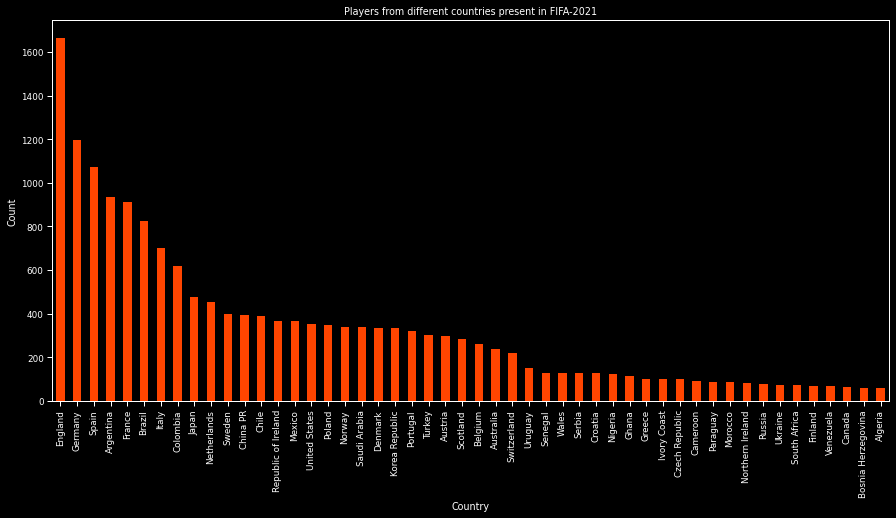

In [74]:
plt.style.use('dark_background') #top 50 nations that the players represent in FIFA 2021
plt.figure(figsize = (15,7))
df['Nationality'].value_counts().head(50).plot.bar(color = 'orangered')
plt.title('Players from different countries present in FIFA-2021')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

#### Ages in which maximum players are present

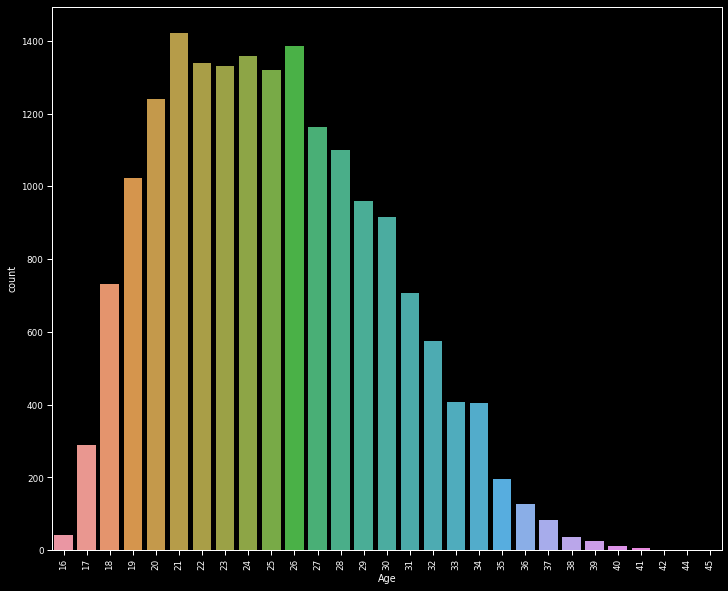

In [75]:
plt.figure(figsize=(12, 10))
sns.countplot(x=df.Age)
plt.xticks(rotation=90);

#### Word Cloud of nationalities of players in the shape of World Cup Trophy

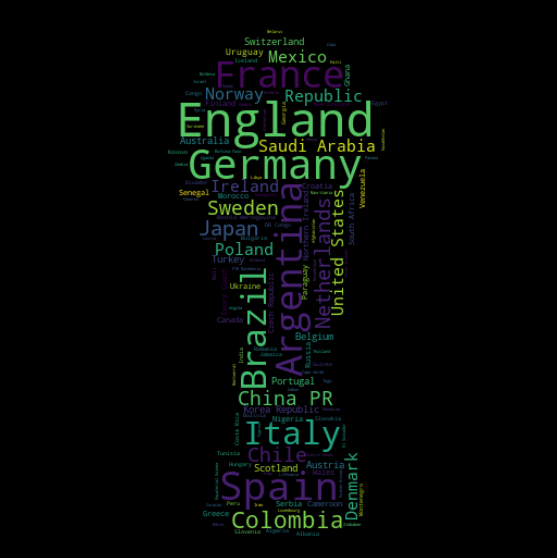

In [76]:
from PIL import Image
from wordcloud import STOPWORDS
mask = np.array(Image.open('fifaimg.jpg'))
nationality = " ".join(n for n in df['Nationality'])
from wordcloud import WordCloud
plt.figure(figsize=(10,10))
wc = WordCloud(stopwords=STOPWORDS,
               mask=mask, background_color="black",
               max_words=2000, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0]).generate(nationality)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Football players preferred feet

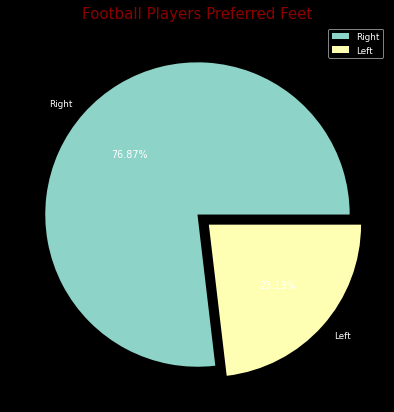

In [79]:
preferred_foot_labels = df["Preferred Foot"].value_counts().index # (Right,Left) 
preferred_foot_values = df["Preferred Foot"].value_counts().values # (Right Values, Left Values)
explode = (0, 0.1) # used to separate a slice of cake

# Visualize
plt.figure(figsize = (7,7))
plt.pie(preferred_foot_values, labels=preferred_foot_labels,explode=explode, autopct='%1.2f%%')
plt.title('Football Players Preferred Feet',color = 'darkred',fontsize = 15)
plt.legend()
plt.show()

#### Distribution of overall rating for all players.

C:\Users\richa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


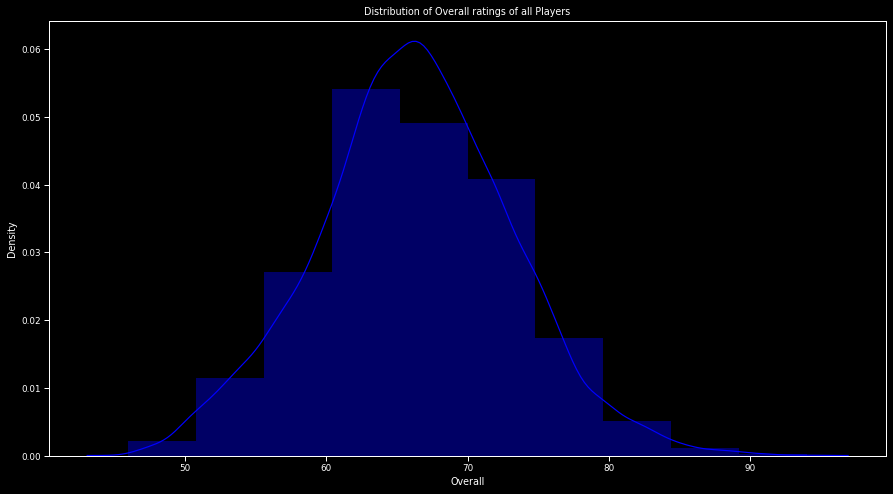

In [80]:
sns.distplot(df['Overall'], bins=10, color='b')
plt.title("Distribution of Overall ratings of all Players")
plt.show()

#### Popular clubs around the world

In [81]:
df['Club'].value_counts().head(10)

AS Monaco             274
FC Barcelona           33
Valencia CF            33
Fortuna Düsseldorf     33
Cardiff City           33
Rayo Vallecano         33
CD Leganés             33
Frosinone              33
Newcastle United       33
Southampton            33
Name: Club, dtype: int64

#### Distribution of overall score in different popular clubs

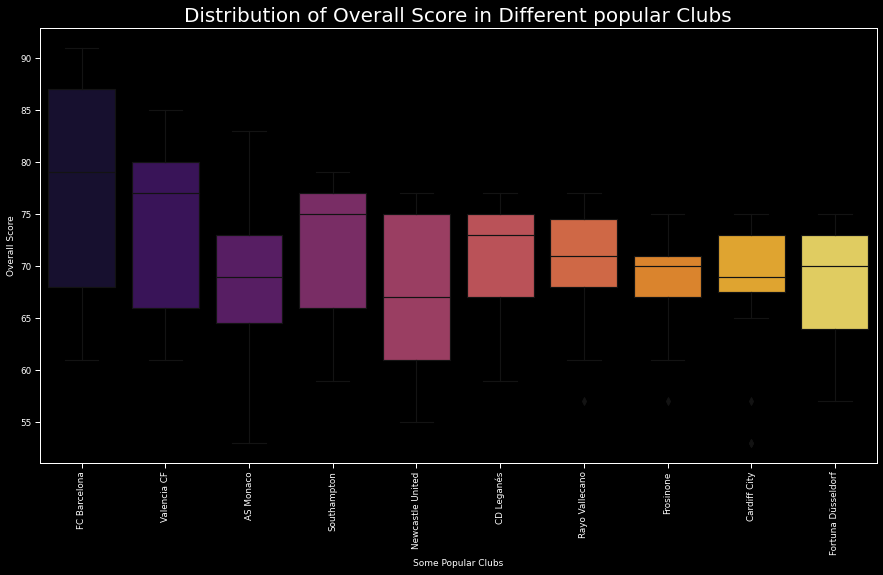

In [82]:
some_clubs = ('AS Monaco', 'FC Barcelona', 'Valencia CF', 'Fortuna Düsseldorf', 'Cardiff City', 'Rayo Vallecano',
             'CD Leganés', 'Frosinone', 'Newcastle United', 'Southampton')

data_clubs = df.loc[df['Club'].isin(some_clubs) & df['Overall']]

plt.rcParams['figure.figsize'] = (15, 8)
ax = sns.boxplot(x = data_clubs['Club'], y = data_clubs['Overall'], palette = 'inferno')
ax.set_xlabel(xlabel = 'Some Popular Clubs', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Score', fontsize = 9)
ax.set_title(label = 'Distribution of Overall Score in Different popular Clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

## Bivariate Analysis

#### Pair plots for the following variables: Overall, Value(millions, Wage, International Reputation, Height and Weight

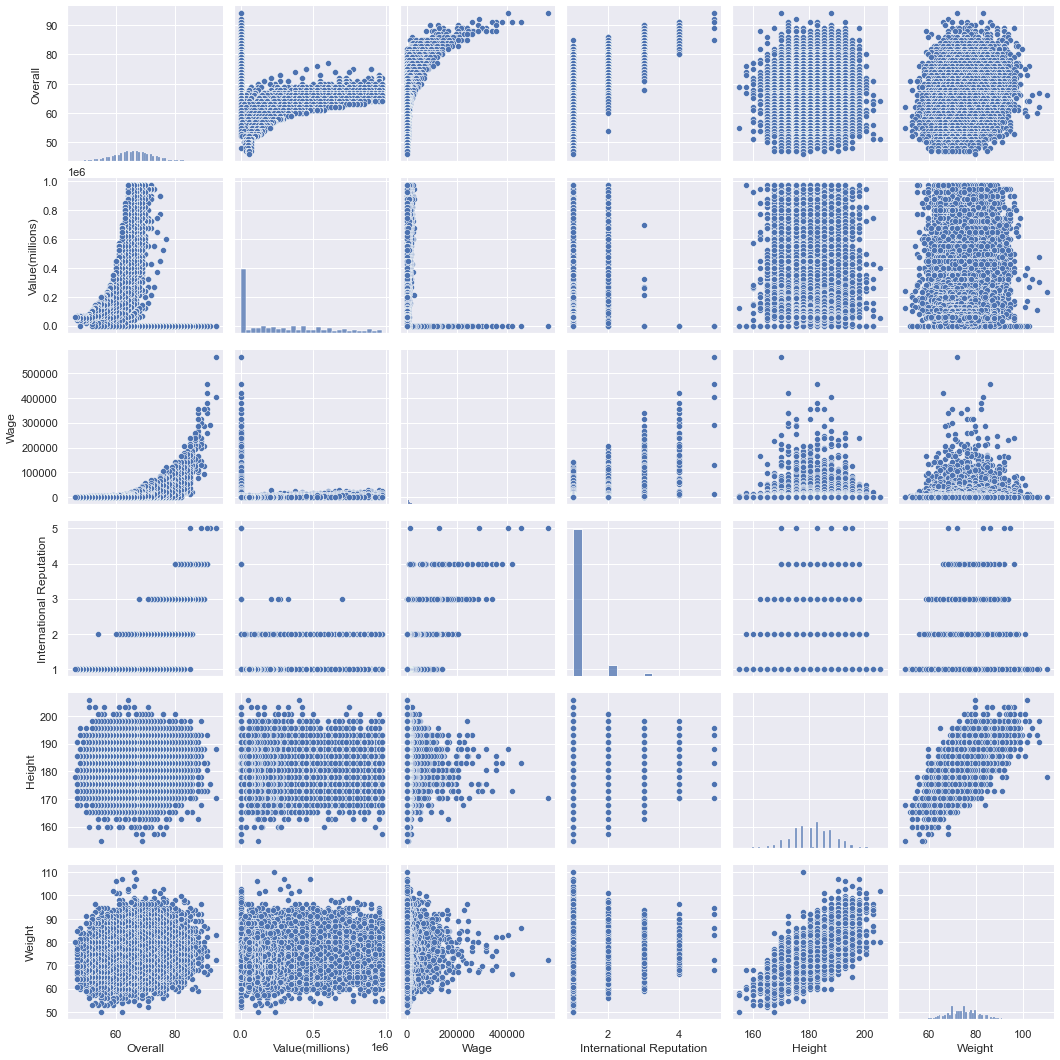

In [83]:
sns.set()
cols = ['Overall', 'Value(millions)', 'Wage', 'International Reputation', 'Height', 'Weight'] 
sns.pairplot(df[cols], height = 2.5)
plt.show()

#### Heatmap of attributes of football players

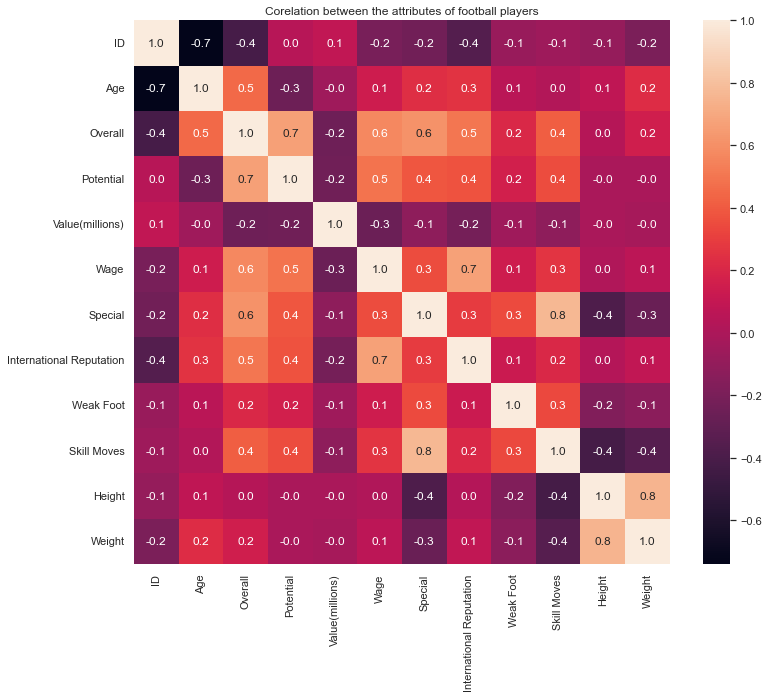

In [84]:
import seaborn as sns
plt.figure(figsize = (12,10))
sns.heatmap(df.corr(), annot = True, fmt = '.1f')
plt.title("Corelation between the attributes of football players")
plt.show()

#### Country vs Overall Ratings of players belonging to them

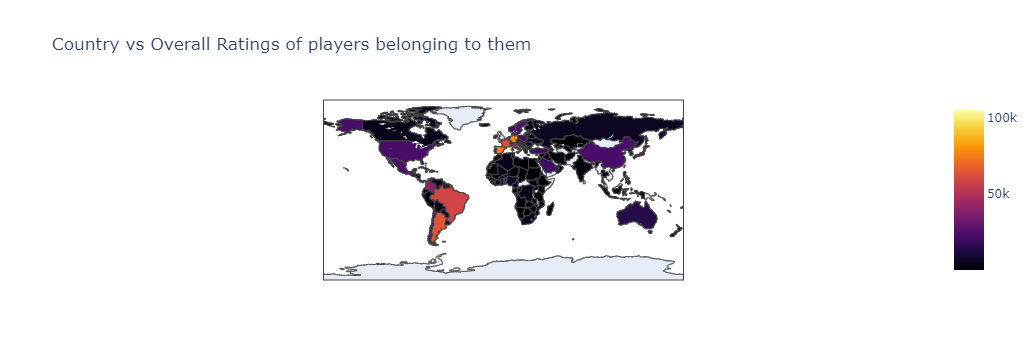

In [85]:
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
rating = pd.DataFrame(df.groupby(['Nationality'])['Overall'].sum().reset_index())
count = pd.DataFrame(rating.groupby('Nationality')['Overall'].sum().reset_index())

plot = [go.Choropleth(
            colorscale = 'inferno',
            locationmode = 'country names',
            locations = count['Nationality'],
            text = count['Nationality'],
            z = count['Overall'],
)]

layout = go.Layout(title = 'Country vs Overall Ratings of players belonging to them')

fig = go.Figure(data = plot, layout = layout)
py.iplot(fig)

## Multivariate Analysis

### Data Pre-processing for PCA and K-Mean Clustering

In [86]:
df2 = df.drop(columns= ['ID', 'Name', 'Nationality', 'Club', 'Value(millions)', 'Wage', 'Preferred Foot', 'Work Rate', 'Body Type',
              'Real Face','Position','Contract Valid Until', 'Height', 'Weight', 'Joined'])
df2.head()

Age  Overall  Potential  Special  International Reputation  Weak Foot  \
0   31       94         94     2202                       5.0        4.0   
1   33       94         94     2228                       5.0        4.0   
2   26       92         93     2143                       5.0        5.0   
3   27       91         93     1471                       4.0        3.0   
4   27       91         92     2281                       4.0        5.0   

   Skill Moves  
0          4.0  
1          5.0  
2          5.0  
3          1.0  
4          4.0

In [87]:
df2.dtypes

Age                           int64
Overall                       int64
Potential                     int64
Special                       int64
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
dtype: object

In [88]:
X = df2.values
# Using the standard scaler method to standardize all of the features by converting them into values between -3 and +3.
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
X

array([[ 1.25867833,  4.01828714,  3.69809177, ...,  9.87713252,
         1.59582491,  2.17064139],
       [ 1.68696087,  4.01828714,  3.69809177, ...,  9.87713252,
         1.59582491,  3.49449051],
       [ 0.18797198,  3.72879875,  3.53512784, ...,  9.87713252,
         3.1119585 ,  3.49449051],
       ...,
       [-1.95344072, -2.78469008, -0.70193445, ..., -0.28694094,
         0.07969132, -0.47705685],
       [-1.73929945, -2.78469008, -0.86489839, ..., -0.28694094,
         0.07969132, -0.47705685],
       [-1.95344072, -2.92943428, -0.86489839, ..., -0.28694094,
         0.07969132, -0.47705685]])

### EDA for PCA and K-Mean Clustering

### Principal Component Analysis

#### Using PCA to reduce dimensionality of the data

In [89]:

from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents2 = pca.fit_transform(X)

#### Reduced features

In [90]:
principalComponents2

array([[ 9.28997893,  1.9235749 ,  4.5423512 ],
       [ 9.96529346,  1.9230709 ,  3.95659477],
       [ 9.74199207,  0.49727381,  3.39826517],
       ...,
       [-2.96733896, -1.75093485, -0.23690531],
       [-2.92381893, -1.52163862, -0.39970846],
       [-2.8677694 , -1.74044564, -0.49648329]])

#### Dataframe featuring  the 3 principal components

In [91]:
PCA_dataset2 = pd.DataFrame(data = principalComponents2, columns = ['component3', 'component4', 'component5'] )
PCA_dataset2.head()

component3  component4  component5
0    9.289979    1.923575    4.542351
1    9.965293    1.923071    3.956595
2    9.741992    0.497274    3.398265
3    4.672389    1.970063    6.432226
4    8.480569    0.384073    2.500090

#### Extracting the three features

In [92]:
principal_component3 = PCA_dataset2['component3']
principal_component4 = PCA_dataset2['component4']
principal_component5 = PCA_dataset2['component5']

### 3D PCA

C:\Users\richa\AppData\Local\Temp\ipykernel_19372\833820981.py:1: MatplotlibDeprecationWarning:

Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().



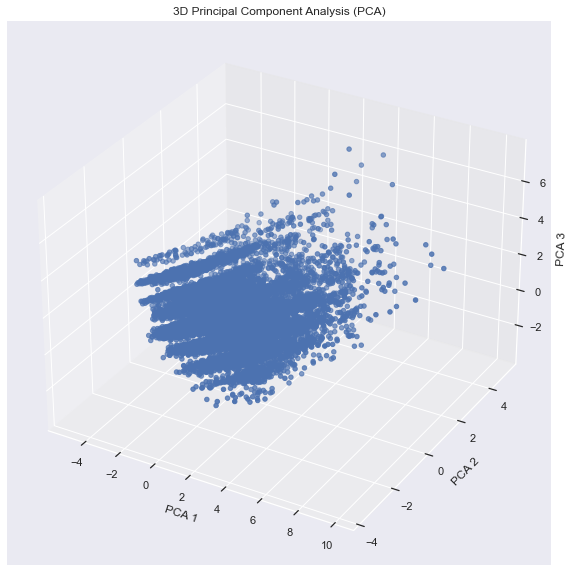

In [93]:
ax = plt.figure(figsize=(10,10)).gca(projection='3d')
plt.title('3D Principal Component Analysis (PCA)')
ax.scatter(
    xs=principal_component3, 
    ys=principal_component4, 
    zs=principal_component5, 
    #c = x_kmeans
)
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
plt.show()

## K-Mean

#### K-Mean clustering algorithm

In [94]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 100, init = 'k-means++', random_state = 1)
x_kmeans = kmeans.fit_predict(principalComponents2)

#### Adding 3 principal component features along with cluster features

In [95]:
df2['Principal Component 3'] = principal_component3
df2['Principal Component 4'] = principal_component4
df2['Principal Component 5'] = principal_component5
df2['Cluster2'] = x_kmeans

In [96]:
df2['Name'] = df['Name']

# 3D K-Mean

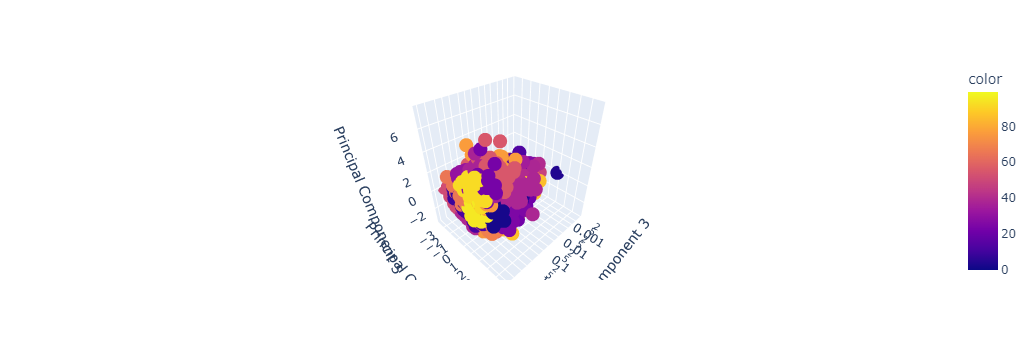

In [97]:
import plotly.express as px
fig = px.scatter_3d(df2, x='Principal Component 3', y='Principal Component 4', z='Principal Component 5',
              color=x_kmeans, log_x=True, hover_name="Name", hover_data=["Overall"])
fig.show()